## Lab 5 - Categorization

This lab must be done **individually**. The required packages have been imported for you below.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import spatial  
from sklearn.model_selection import LeaveOneOut

Data adapted from Leuven Concept Database (De Deyne et al., 2008).

Extract data from file.

In [2]:
df = pd.read_csv('data-categorization.csv')

Get feature list.

In [3]:
features = list(df.features)
features.remove('category')

Get names of all animals.

In [4]:
names = list(df); del names[0]

Get binary feature matrix (animal-by-feature).

In [5]:
F = pd.read_csv("data-categorization.csv", header=0, usecols=list(np.arange(1,54)))
F = np.asarray(F)

Get category labels.

In [6]:
labels = F[len(F)-1,:]

Config `F` such that each row is feature vector of one animal.

Each column is either a bird (category label = 0) or a fish (category label = 1).

In [7]:
F = np.delete(F,len(F)-1,0) 
F = np.transpose(F)

You should have the following variables:

(**Hint**: Print them out to see what they are).

1. Main variables you'll need for analysis:
    - `F`:        53-by-44 binary matrix, i.e. 53 animal exemplars (30 birds and 23 fish) and 44 features
    - `labels`:   53 binary category labels (0 for bird; 1 for fish), i.e. ground truth that you'll predict
    
    
2. Auxillary variables
    - `names`:    53 animal names
    - `features`: 44 feature names

### Data visualization (not assessed)

Run the code below to visualize the animals in two dimensions, via multi-dimensional scaling.

Text(0, 0.5, 'Dimension 2')

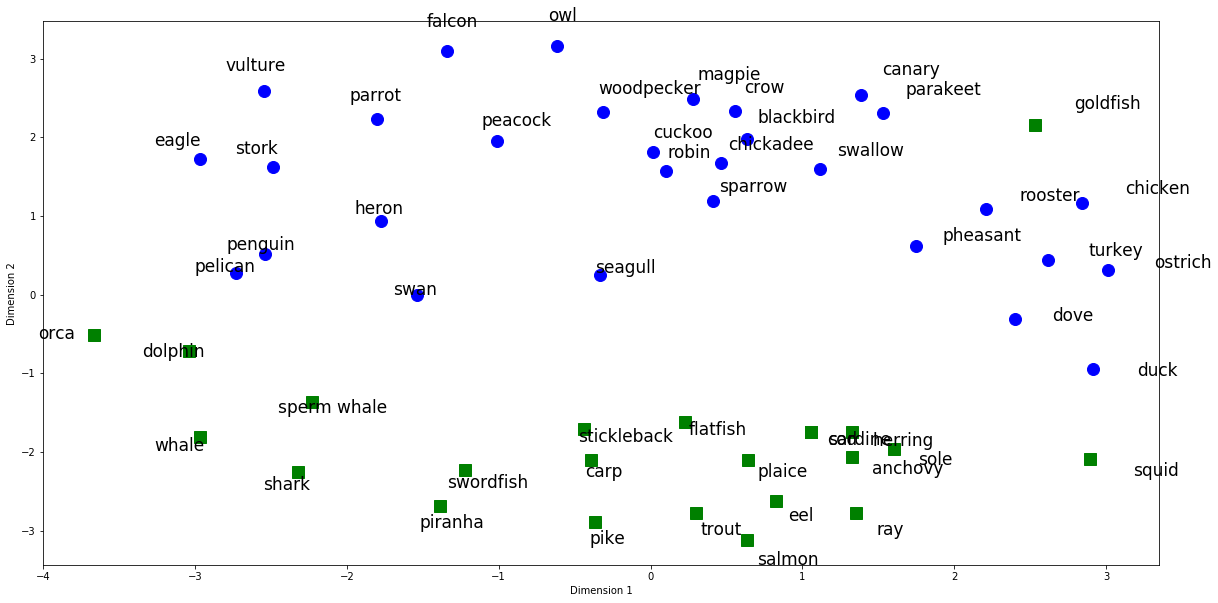

In [68]:
from sklearn.manifold import MDS

embedding = MDS(n_components=2)
F_lowdim = embedding.fit_transform(F)

birdinds = np.where(labels==0)
fishinds = np.where(labels==1)

fig = plt.figure(figsize=(20, 10))
plt.plot(F_lowdim[birdinds,0],F_lowdim[birdinds,1],'bo',markersize=12)
plt.plot(F_lowdim[fishinds,0],F_lowdim[fishinds,1],'gs',markersize=12)

for i in range(0,len(F)):
    plt.text(F_lowdim[i,0]*1.1,F_lowdim[i,1]*1.1,names[i],fontsize=17)
    
plt.xlabel('Dimension 1')    
plt.ylabel('Dimension 2')    

# plt.show()

### Tasks 1-3 [10 pts] 
**Task 1**: Evaluate each model by standard leave-one-animal-out cross validation. **[2 pts]**

**Task 2**: Implement two models of categorization: a prototype model **[2pts]** and an exemplar model **[2pts]**.

**Task 3**: Report predictive accuracy of each model in percentage (i.e. % correct predictions out of 53 animals). **[1 pt]**

**Task 4**: Perform an error analysis on the two models (i.e. report which exemplars each model failed on), then compare and discuss why the errors look the way they do. **[3 pts]**


**Hint:** Consider using the following wrapper code for performing the leave-one-out (LOO) cross validation.

You may also want to refer to description and example code here: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html

In [59]:
def pickLabelBasedOnDist(birdList, fishList):
    if (birdList.mean() == fishList.mean()):
        # Randomly pick 0 or 1
        return np.random.choice(2, 1)[0]
    elif (birdList.mean() < fishList.mean()):
        return 0 # Bird
    else:
        return 1 # Fish
    
def prototypeModelPredictLabel(F_train, F_test, labels_train, index, names):
    distToBirdList, distToFishList = [], []
    for index in range(len(F_train)):
        eDist = spatial.distance.euclidean(F_train[index], F_test)
        if (labels_train[index] == 0):
            distToBirdList = np.append(distToBirdList, eDist)
        else:
            distToFishList = np.append(distToFishList, eDist)
    birdOrFish = pickLabelBasedOnDist(distToBirdList, distToFishList)
    return [birdOrFish, distToBirdList, distToFishList]

def exemplarModelPredictLabel(F_train, F_test, labels_train, index, names):
    distToBirdList, distToFishList = [], []
    for i in range(len(F_train)):
        eDist = spatial.distance.euclidean(F_train[i], F_test)
        similarity = np.exp(eDist**2)
        if (labels_train[i] == 0):
            distToBirdList = np.append(distToBirdList, similarity)
        else:
            distToFishList = np.append(distToFishList, similarity)
            

        if (names[index] == "penguin"):
            print (names[i], " " , similarity)
            
    birdOrFish = pickLabelBasedOnDist(distToBirdList, distToFishList)
    
        
    return [birdOrFish, distToBirdList, distToFishList]
    
def calculateProbability(correctAnswerList, predicatedAnswerList):
    numOfCorrect = 0
    for i in range(len(correctAnswerList)):
        if (correctAnswerList[i] == predicatedAnswerList[i]):
            numOfCorrect += 1
    return numOfCorrect / len(correctAnswerList)


In [67]:
loo = LeaveOneOut()
loo.get_n_splits(F)

pModelLabels = []
eModelLabels = []
correctLabels = []

birdinds = np.where(labels==0)
fishinds = np.where(labels==1)

for train_index, test_index in loo.split(F):
#     ...... your code here ......
#     1) Get training and testing data points
    F_train, F_test = F[train_index], F[test_index]
    labels_train, labels_test = labels[train_index], labels[test_index][0]
    correctLabels = np.append(correctLabels, labels_test)

#     2.2) Implement and predict with exemplar model
    distToBirdList, distToFishList = [], []
    for i in train_index:
        eDist = spatial.distance.euclidean(F[i], F_test)
        similarity = np.exp(eDist**2)
        if (labels[i] == 0):
            distToBirdList = np.append(distToBirdList, similarity)
        else:
            distToFishList = np.append(distToFishList, similarity)
            

        if (names[test_index[0]] == "penguin"):
            print (names[i], " " , similarity)
            
    birdOrFish = pickLabelBasedOnDist(distToBirdList, distToFishList)
    
        

eagle   59874.14171519782
dove   9744803446.248867
duck   65659969.13733028
magpie   442413.39200891973
pheasant   3269017.3724721163
vulture   59874.14171519782
rooster   3269017.3724721163
turkey   24154952.7535753
canary   24154952.7535753
chicken   485165195.409792
cuckoo   1202604.2841647768
crow   8886110.520507872
chickadee   442413.39200891973
seagull   162754.79141900362
blackbird   8886110.520507872
sparrow   8886110.520507872
stork   22026.465794806754
parrot   59874.14171519782
parakeet   3269017.3724721163
peacock   8103.083927575384
pelican   148.41315910257674
heron   3269017.3724721163
robin   1202604.2841647768
woodpecker   162754.79141900362
ostrich   8886110.520507872
owl   3269017.3724721163
falcon   3269017.3724721163
swan   59874.14171519782
swallow   1202604.2841647768
anchovy   178482300.9631879
dolphin   59874.14171519782
trout   178482300.9631879
goldfish   24154952.7535753
shark   3269017.3724721163
herring   485165195.409792
squid   1318815734.4832146
cod   

In [45]:
loo = LeaveOneOut()
loo.get_n_splits(F)

pModelLabels = []
eModelLabels = []
correctLabels = []

birdinds = np.where(labels==0)
fishinds = np.where(labels==1)

for train_index, test_index in loo.split(F):
#     ...... your code here ......
#     1) Get training and testing data points
    F_train, F_test = F[train_index], F[test_index]
    labels_train, labels_test = labels[train_index], labels[test_index][0]
    correctLabels = np.append(correctLabels, labels_test)
    
#     2.1) Implement and predict with prototype model
    [birdOrFish, pDistToBirdList, pDistToFishList] = prototypeModelPredictLabel(F_train, F_test, labels_train, test_index, names)
    pModelLabels = np.append(pModelLabels, birdOrFish)
    
#     2.2) Implement and predict with exemplar model
    [birdOrFish, eDistToBirdList, eDistToFishList] = exemplarModelPredictLabel(F_train, F_test, labels_train, test_index, names)
    eModelLabels = np.append(eModelLabels, birdOrFish)

# 3) Report predictive accuracies (%)
prototypeProbability = calculateProbability(correctLabels, pModelLabels)
print ("Prototype Predicitive Accuracy: ", prototypeProbability, "%")

exemplarProbability = calculateProbability(correctLabels, eModelLabels)
print ("Exemplar Predicitive Accuracy: ", exemplarProbability, "%")

# 4) Perform an error analysis on the two models 
# (i.e. report which exemplars each model failed on), 
# then compare and discuss why the errors look the way they do. [3 pts]
def whatAreTheDifference(correctLabels, predicatedLabels, names):
    diffs = []
    for i in range(len(predicatedLabels)):
        if (correctLabels[i] != predicatedLabels[i]):
            diffs = np.append(diffs, i)
    for i in diffs:
        print (names[int(i)])

print ("Error Analysis:")
print ("The animals that the prototype model predicted wrong:")
whatAreTheDifference(correctLabels, pModelLabels, names)
print ("------------")
print ("The animals that the exemplar model predicted wrong:")
whatAreTheDifference(correctLabels, eModelLabels, names)

salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
salmon
Prototype Predicitive Accuracy:  0.9622641509433962 %
Exemplar Predicitive Accuracy:  0.9245283018867925 %
Error Analysis:
The animals that the prototype model predicted wrong:
duck
goldfish
------------
The animals that the exemplar model predicted wrong:
duck
penguin
goldfish
squid


Export and submit a **fully executable** Python Jupyter Notebook and a PDF copy of your notebook showing all results. 